In [ ]:
import numpy as np 

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima


     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 41.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df= pd.read_csv('/content/germany-wind-energy.csv')


In [ ]:
df.head()

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wind_generation_actual,1094.0,305819.767824,205728.857915,16482.000,148552.75000,254332.5000,412570.500,998899.000
wind_capacity,1094.0,45066.022789,4315.838061,37149.130,41447.93750,46073.0000,49203.000,50452.000
temperature,1094.0,10.050167,7.739158,-9.363,3.57725,10.0465,16.566,28.241


In [ ]:
df['utc_timestamp']=pd.to_datetime(df['utc_timestamp'])


In [ ]:
df.set_index('utc_timestamp',inplace=True)


In [ ]:
df.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [ ]:
drop=df.drop(['wind_capacity','temperature'],axis=1,inplace=True)

In [ ]:
df.head()

,wind_generation_actual
utc_timestamp,
2017-01-01 00:00:00+00:00,291760.0
2017-01-02 00:00:00+00:00,295097.0
2017-01-03 00:00:00+00:00,666170.0
2017-01-04 00:00:00+00:00,686581.0
2017-01-05 00:00:00+00:00,261759.0


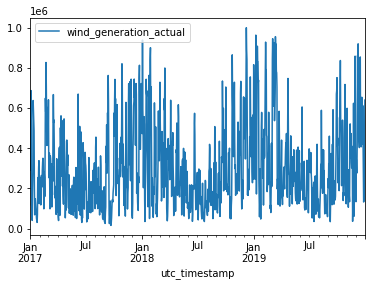

In [ ]:
df.plot()

In [ ]:
# Calculate the Missing Values 
df.isna().sum()

wind_generation_actual    0
wind_capacity             0
temperature               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2017-01-01 00:00:00+00:00 to 2019-12-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wind_generation_actual  1094 non-null   float64
 1   wind_capacity           1094 non-null   float64
 2   temperature             1094 non-null   float64
dtypes: float64(3)
memory usage: 34.2 KB


In [ ]:
#stationarity test
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)


(0.01, False)

In [ ]:
#Spliting the dataset into train and test
train = df[:85]
test = df[-20:]


In [ ]:
train.tail()


,wind_generation_actual
utc_timestamp,
2017-03-22 00:00:00+00:00,168379.0
2017-03-23 00:00:00+00:00,211125.0
2017-03-24 00:00:00+00:00,152372.0
2017-03-25 00:00:00+00:00,203031.0
2017-03-26 00:00:00+00:00,79142.0


In [ ]:
test.head()

,wind_generation_actual
utc_timestamp,
2019-12-11 00:00:00+00:00,436289.0
2019-12-12 00:00:00+00:00,403284.0
2019-12-13 00:00:00+00:00,555000.0
2019-12-14 00:00:00+00:00,843230.0
2019-12-15 00:00:00+00:00,853649.0


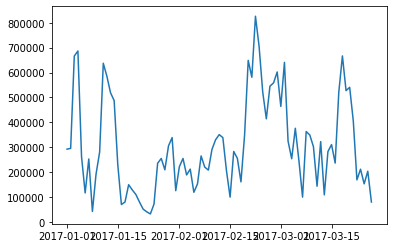

In [ ]:
plt.plot(train)


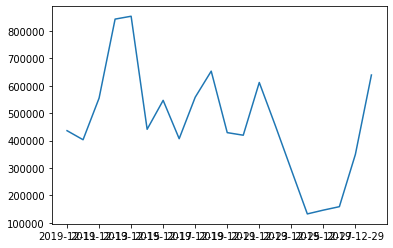

In [ ]:
plt.plot(test)

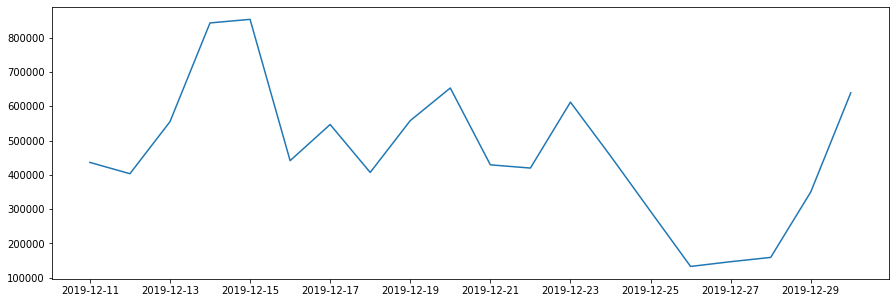

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test)


In [ ]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1971.530, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1946.219, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1938.445, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1973.464, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1938.722, Time=0.39 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1938.864, Time=0.63 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1941.371, Time=0.20 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1940.523, Time=1.11 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1944.153, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1938.340, Time=0.72 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1939.124, Time=1.28 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1939.135, Time=2.77 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1942.096, Time=0.88 sec
 ARIMA(1,1,1)(1,1,2)[12]

In [33]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   85
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -965.170
Date:                            Mon, 24 Jan 2022   AIC                           1938.340
Time:                                    20:36:21   BIC                           1947.447
Sample:                                         0   HQIC                          1941.966
                                             - 85                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7588      0.253      2.995      0.003       0.262       1.255
ma.L1         -0.9440      0.232     -4.075      0.000      -1.398      -0.490
ma.S.L12      -0.7344      0.237     -3.098      0.002      -1.199      -0.270
sigma2      3.727e+10   3.28e-12   1.14e+22      0.000    3.73e+10    3.73e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.92   Prob(JB):                         0.89
Heteroskedasticity (H):               1.39   Skew:                            -0.13
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.3e+37. Standard errors may be unstable.
"""

In [34]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_Wind Energy']
prediction


,predicted_Wind Energy
utc_timestamp,
2019-12-11 00:00:00+00:00,134788.775926
2019-12-12 00:00:00+00:00,190232.358780
2019-12-13 00:00:00+00:00,299943.153784
2019-12-14 00:00:00+00:00,368758.596474
2019-12-15 00:00:00+00:00,306706.285279
2019-12-16 00:00:00+00:00,340642.161212
2019-12-17 00:00:00+00:00,289578.685159
2019-12-18 00:00:00+00:00,238684.442618
2019-12-19 00:00:00+00:00,212133.190207


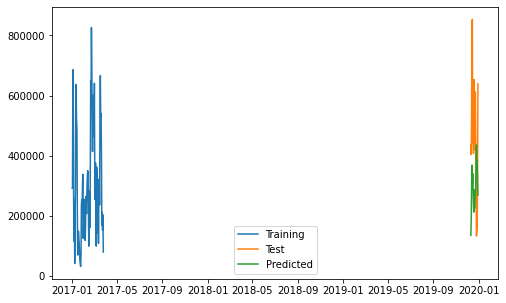

In [35]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()
